In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\machine learning\\Projects\\kaggle dataset\\Housing.csv")

# DATA UNDERSTANDING

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df_cat=df.select_dtypes(include=['object'])
df_count=len(df_cat.columns)
df_cat=df_cat.columns
print(f"Total number of categorical feature is :{df_count}\n which is {df_cat}")
df_num=df.select_dtypes(include=['int','float'])
df_cou=len(df_num.columns)
print(f"Total number of numerical feature is :{df_cou}\n which is {df_num.columns}")

Total number of categorical feature is :7
 which is Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')
Total number of numerical feature is :6
 which is Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


In [10]:
for i in df_cat:
    print(df[i].value_counts(normalize=True))

mainroad
yes    0.858716
no     0.141284
Name: proportion, dtype: float64
guestroom
no     0.822018
yes    0.177982
Name: proportion, dtype: float64
basement
no     0.649541
yes    0.350459
Name: proportion, dtype: float64
hotwaterheating
no     0.954128
yes    0.045872
Name: proportion, dtype: float64
airconditioning
no     0.684404
yes    0.315596
Name: proportion, dtype: float64
prefarea
no     0.765138
yes    0.234862
Name: proportion, dtype: float64
furnishingstatus
semi-furnished    0.416514
unfurnished       0.326606
furnished         0.256881
Name: proportion, dtype: float64


Text(0, 0.5, 'Frequency')

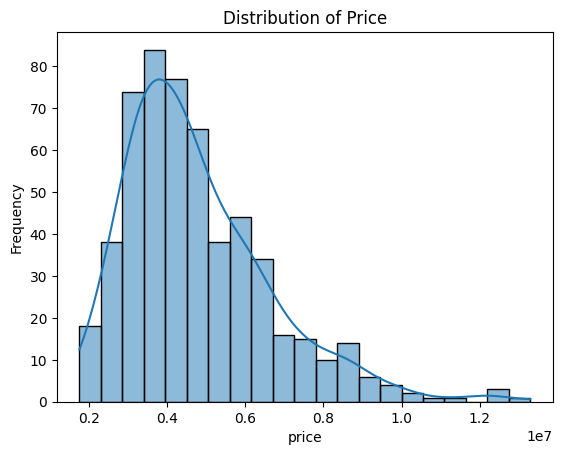

In [11]:
sns.histplot(data=df['price'],kde=True)
plt.title('Distribution of Price')
plt.ylabel('Frequency')

<Axes: >

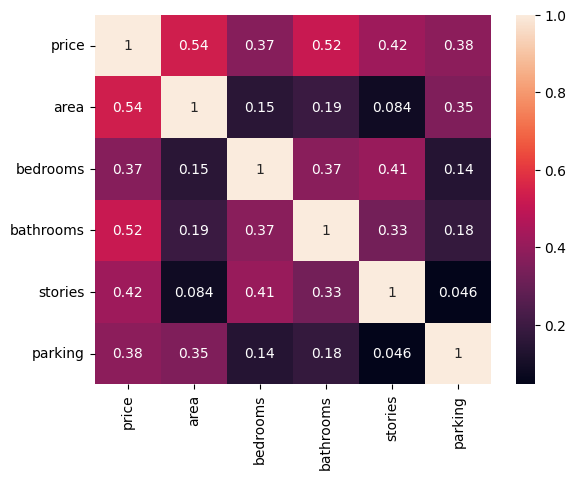

In [12]:
sns.heatmap(df_num.corr(),annot=True)

# DATA CLEANING AND PREPROCESSING

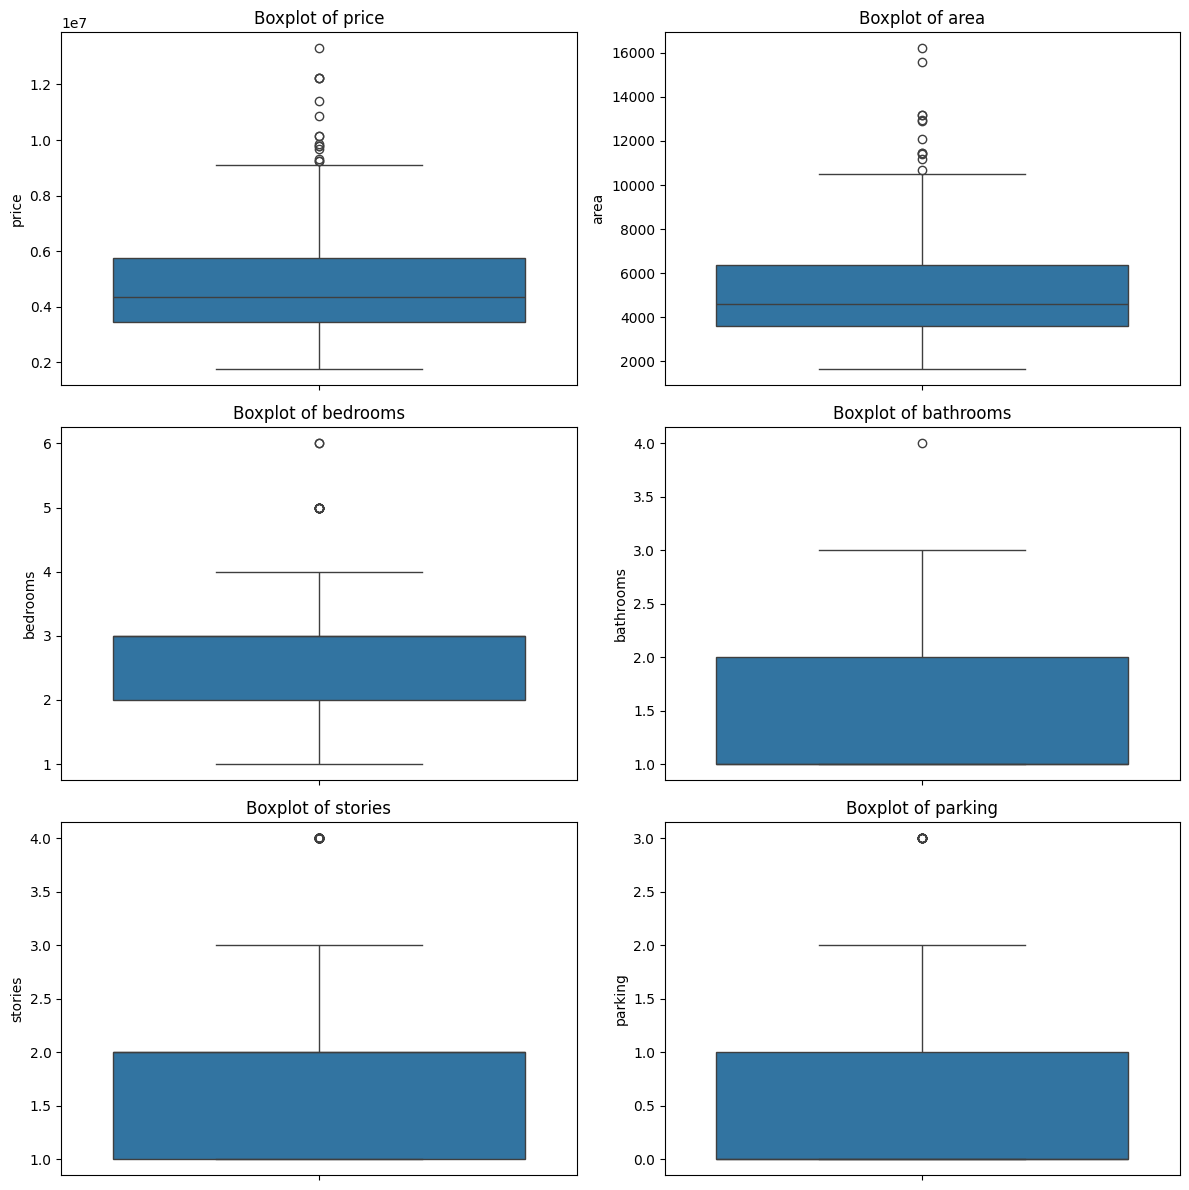

In [13]:
plt.figure(figsize=(12,12))
for i ,col in enumerate(df_num):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

In [14]:
def remove_outliers_std(feature, df):
    lower_limit=df[feature].quantile(0.01)
    upper_limit=df[feature].quantile(0.99)
    return df[(df[feature]>=lower_limit)&(df[feature]<=upper_limit)]

In [15]:
df_1=remove_outliers_std('price',df)
df_2=remove_outliers_std('area',df_1)

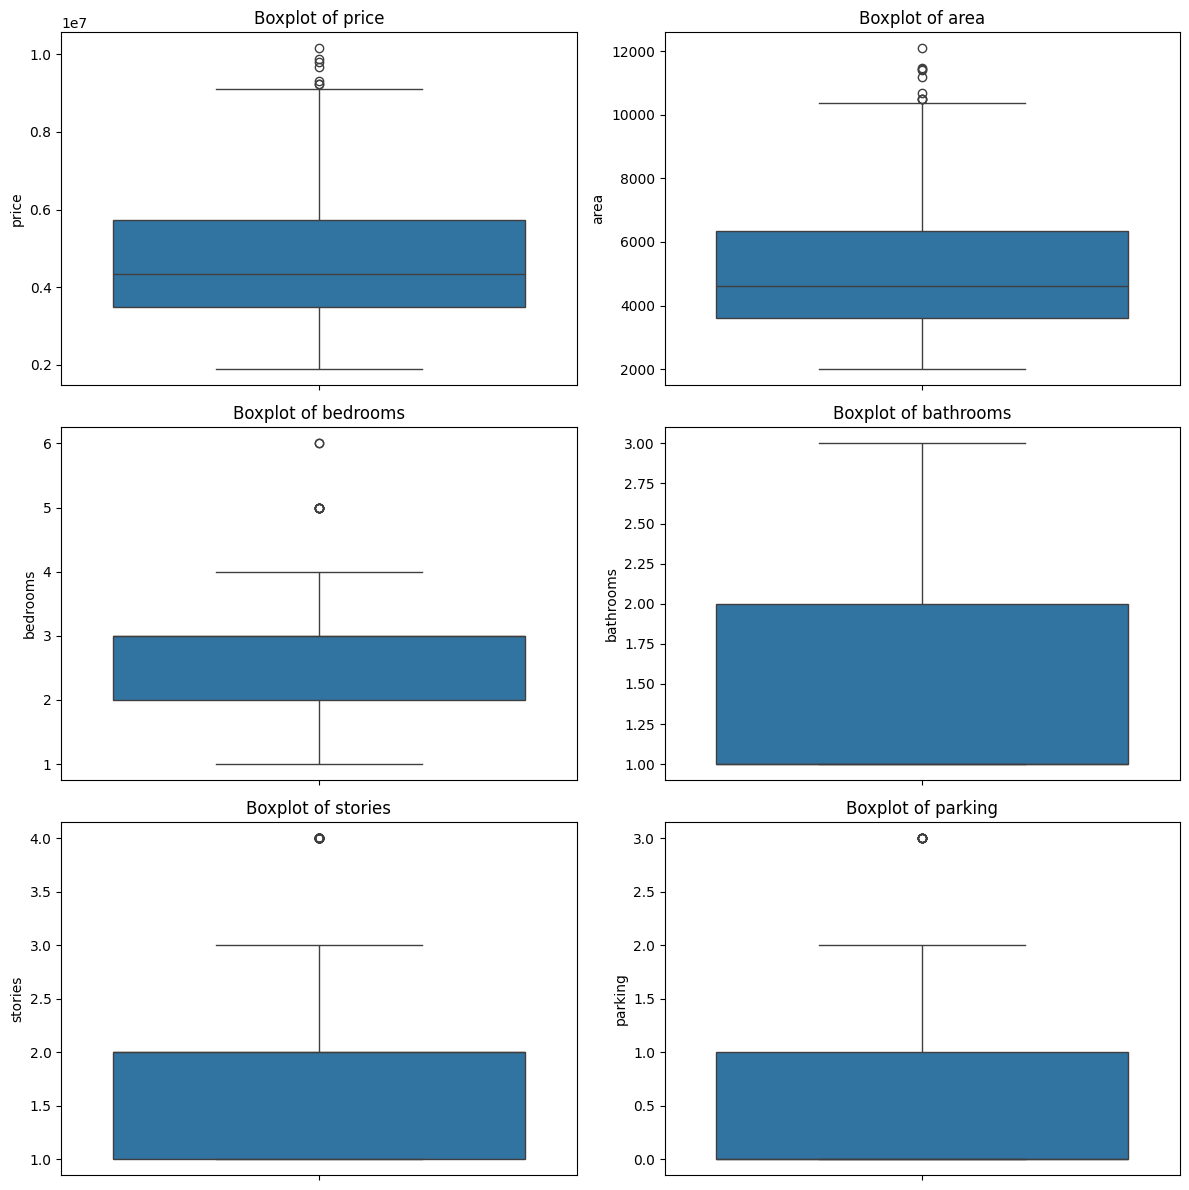

In [16]:
plt.figure(figsize=(12,12))
for i ,col in enumerate(df_num):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df_2[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

In [17]:
df_2.shape

(521, 13)

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\790615087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['log price']=np.log(df_2.price)


Text(0, 0.5, 'Frequency')

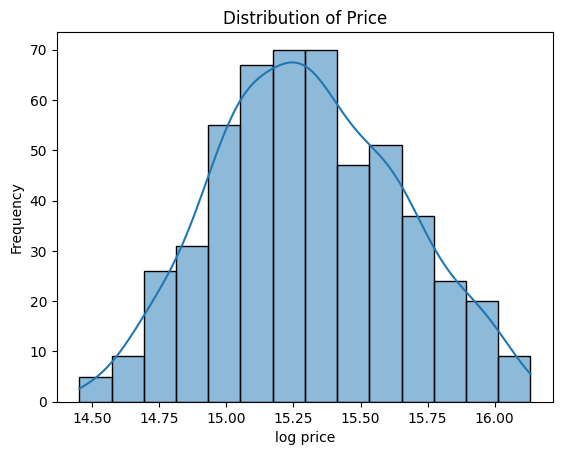

In [18]:
df_2['log price']=np.log(df_2.price)
sns.histplot(data=df_2['log price'],kde=True)
plt.title('Distribution of Price')
plt.ylabel('Frequency')

In [19]:
df_2[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] =df_2[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].replace({'yes': 1, 'no': 0})

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\3663416220.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] =df_2[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].replace({'yes': 1, 'no': 0})
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\3663416220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airco

In [20]:
df_2= pd.get_dummies(df_2, columns=['furnishingstatus'], drop_first=True)
bool_cols = df_2.select_dtypes(include='bool').columns
df_2[bool_cols] = df_2[bool_cols].astype(int)

# EXPLORATORY DATA ANALYSIS

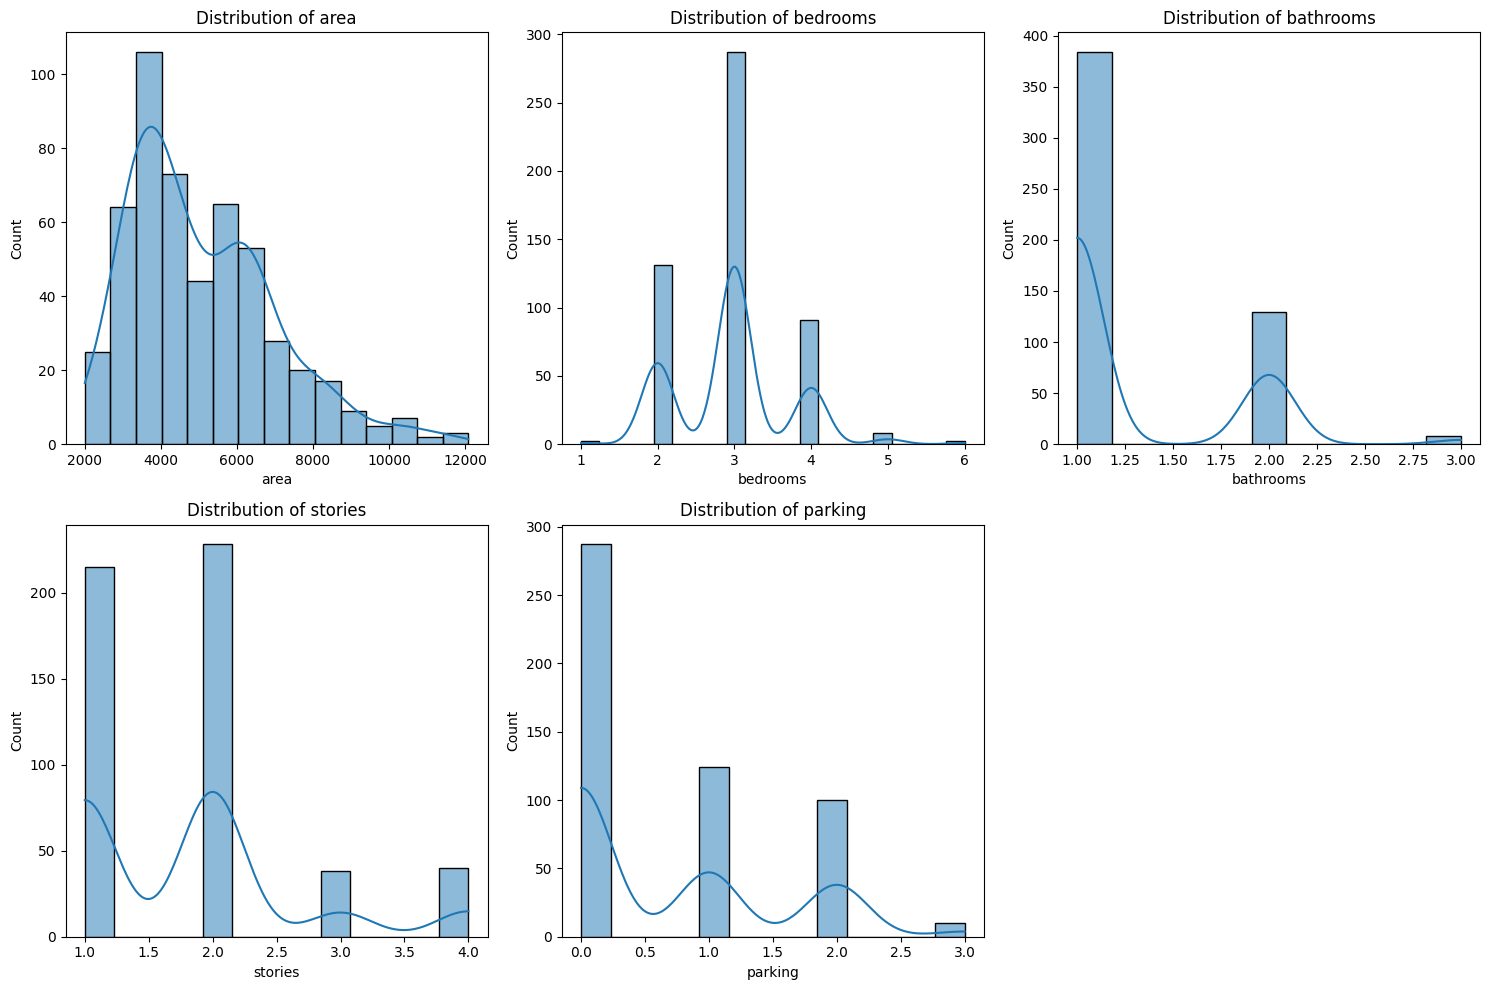

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_2[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1926403101.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1926403101.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1926403101.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipyke

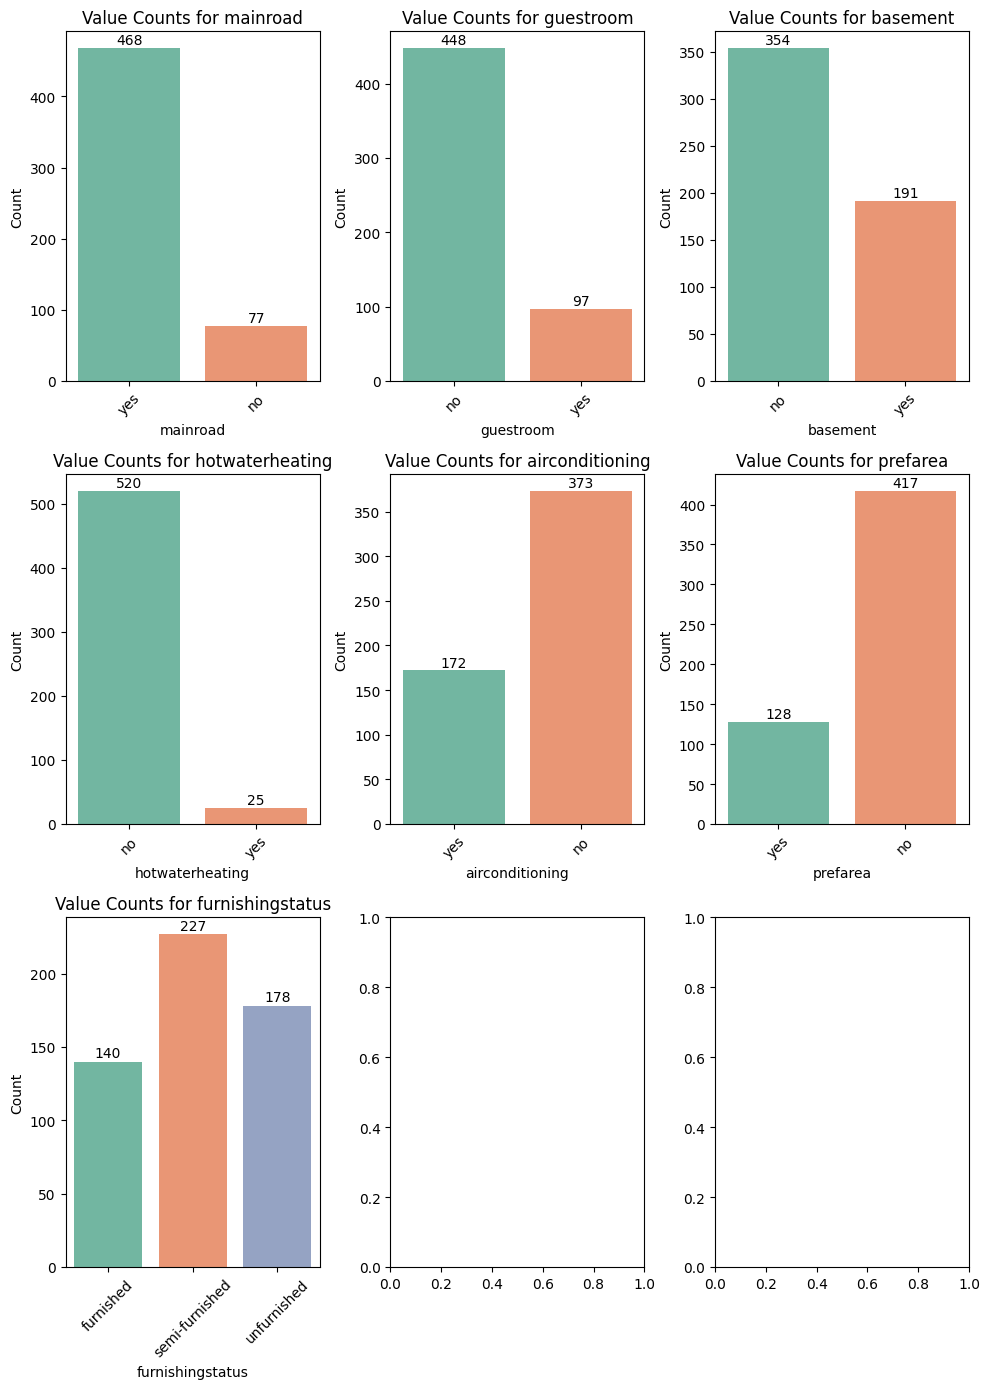

In [22]:
fig, axes = plt.subplots(3,3, figsize=(10,14))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(df_cat):
    ax = axes[i]
    plot = sns.countplot(data=df, x=col, ax=ax, palette='Set2')
    ax.set_title(f'Value Counts for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
    # Add count labels on top of bars
    for p in plot.patches:
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y + 1, count, ha='center', va='bottom', fontsize=10)
plt.tight_layout()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1363923487.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_2,x=col,y='log price',palette='Set2')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1363923487.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_2,x=col,y='log price',palette='Set2')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1363923487.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_2,x=col,y='log price',palette='Set2')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1363923487.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_2,x=col,y='log price',palette='Set2')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\1363923487.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assi

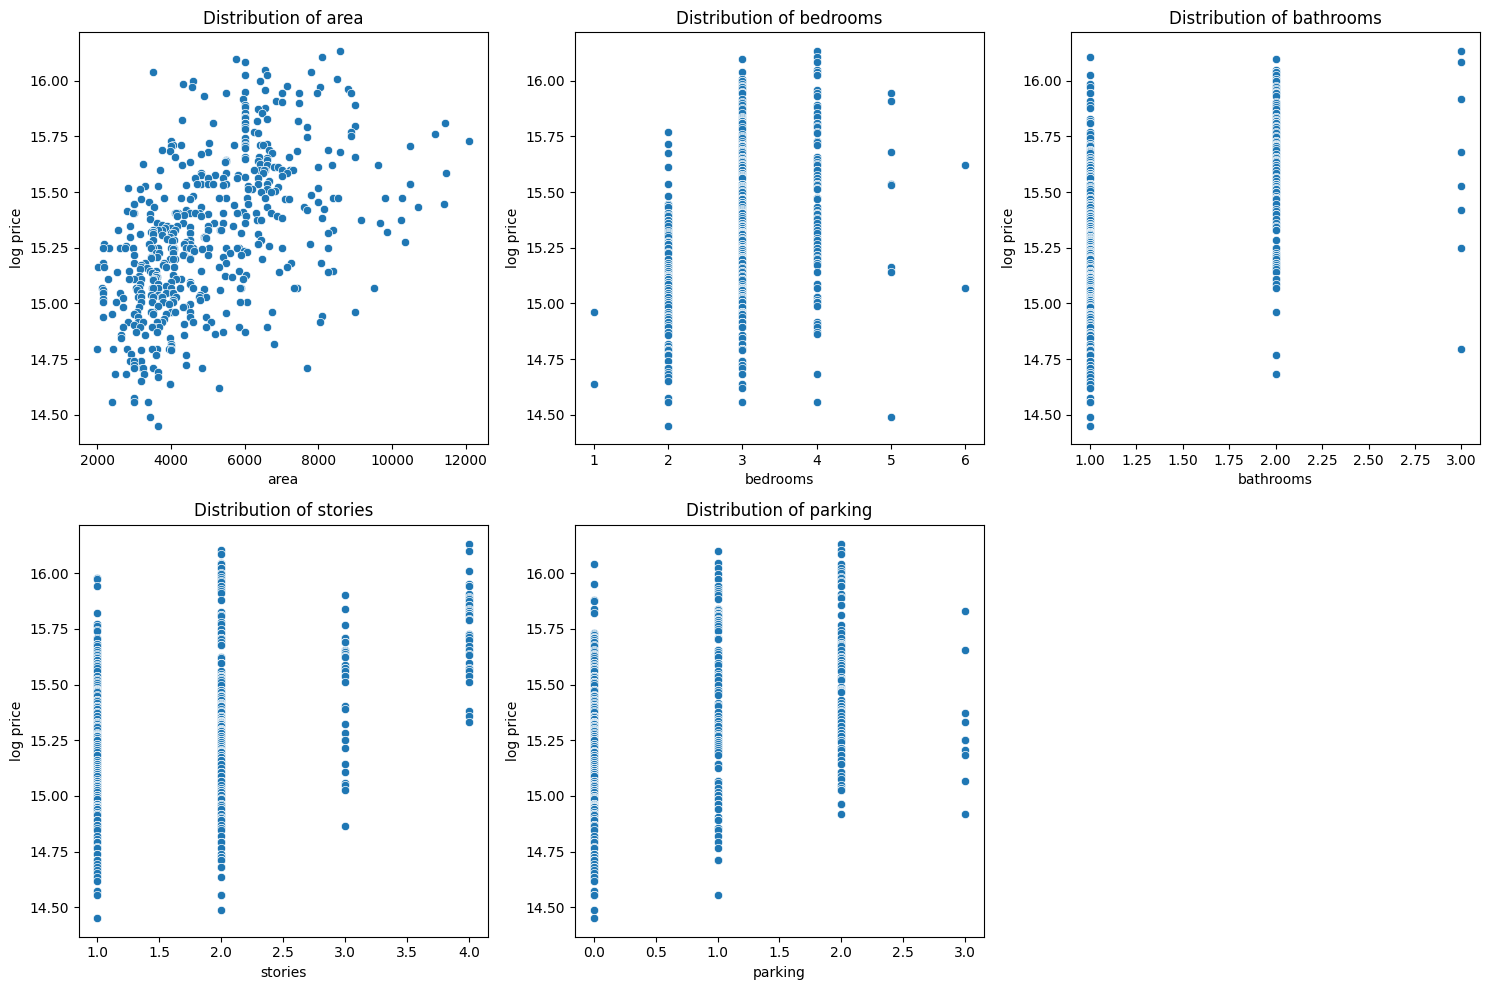

In [23]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df_2,x=col,y='log price',palette='Set2')
    plt.title(f'Distribution of {col}')
plt.tight_layout()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\4049287845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2,x=col,y='log price',palette='Set3')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\4049287845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2,x=col,y='log price',palette='Set3')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\4049287845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2,x=col,y='log price',palette='Set3')
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4

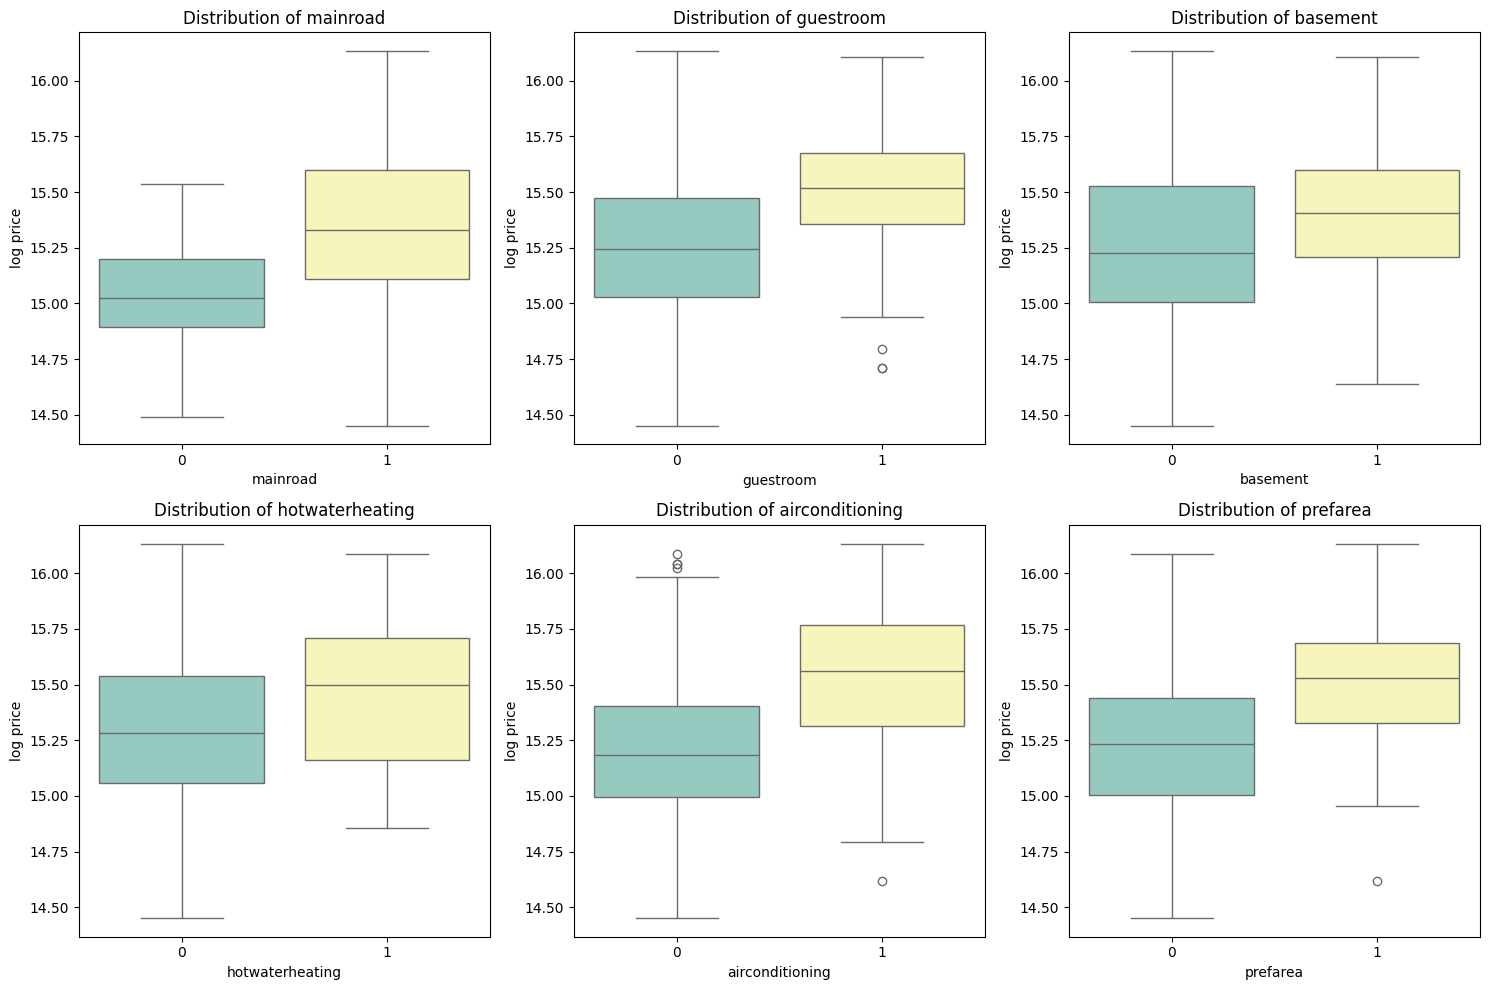

In [24]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df_2,x=col,y='log price',palette='Set3')
    plt.title(f'Distribution of {col}')
plt.tight_layout()

In [36]:
df_2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log price,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,16.132984,1,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,16.105010,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,16.097893,0,1
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,16.085676,1,0
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,16.046600,1,0


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_4204\240364901.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='furnishing_status', y='log price',data=furnishing_data,palette='Set3')


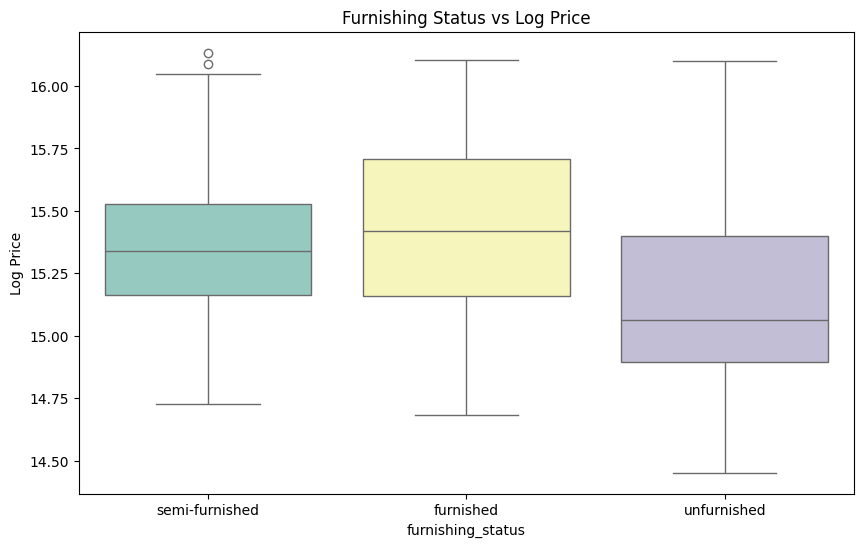

In [25]:
furnishing_data = df_2.copy()
conditions = [
    furnishing_data['furnishingstatus_semi-furnished'] == 1,
    furnishing_data['furnishingstatus_unfurnished'] == 1
]
choices = ['semi-furnished', 'unfurnished']
furnishing_data['furnishing_status'] = np.select(conditions, choices, default='furnished')
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishing_status', y='log price',data=furnishing_data,palette='Set3')
plt.title('Furnishing Status vs Log Price')
plt.ylabel('Log Price')
plt.show()


# MODEL TRAINING

In [26]:
x=df_2.drop(['price','log price'],axis='columns')
y=df_2['log price']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)
X_scaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.822402,1.424045,3.577825,2.510956,0.393968,-0.475271,-0.726539,-0.214906,1.468869,1.559702,1.80845,1.165103,-0.689870
1,1.572774,1.424045,-0.578355,0.213839,0.393968,2.104064,1.376388,-0.214906,1.468869,1.559702,1.80845,-0.858293,-0.689870
2,0.350636,0.057696,1.499735,2.510956,0.393968,2.104064,-0.726539,-0.214906,1.468869,0.378590,1.80845,-0.858293,1.449548
3,0.480650,1.424045,3.577825,0.213839,0.393968,2.104064,1.376388,4.653190,-0.680796,1.559702,-0.55296,1.165103,-0.689870
4,0.766683,1.424045,1.499735,0.213839,0.393968,-0.475271,-0.726539,-0.214906,1.468869,0.378590,1.80845,1.165103,-0.689870


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,random_state=11,test_size=0.2)

In [29]:
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7208090107055792